***EDA Assignment***

In [1]:
# Importing pandas and numpy library
import pandas as pd
import numpy as np

In [2]:
# Reading household power consumption data and specifyong all the parameters as per checkpoint 2
household_power_consumption = pd.read_csv("C:\\Users\\ankit\\Desktop\\IIITB\\Course 2\\Assignment\\household_power_consumption\\household_power_consumption.txt", \
                                          sep=';', header=0, low_memory = False, infer_datetime_format=True, \
                                          parse_dates={'datetime':[0,1]}, index_col=['datetime'])

In [3]:
# Verifying if the loading is correct
# Number of rows - 2075259
# Number of columns - 7
household_power_consumption.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 126.7+ MB


In [4]:
# Replacing all the '?' with nan (not a number) as per checkpoint 4
household_power_consumption = household_power_consumption.replace('?', np.nan)

In [5]:
# Converting global active power in watts and converting dtype of all other columns to float for further analysis
household_power_consumption = household_power_consumption.astype(float)
household_power_consumption['Global_active_power'] = household_power_consumption['Global_active_power']*1000
household_power_consumption['Global_active_power'] = household_power_consumption['Global_active_power']/60

In [6]:
# Creating and adding new field Sub_metering_4 as per checkpoint 5
household_power_consumption['Sub_metering_4'] = household_power_consumption['Global_active_power'] \
                                                - (household_power_consumption['Sub_metering_1'] \
                                                    + household_power_consumption['Sub_metering_2'] \
                                                    + household_power_consumption['Sub_metering_3']
                                                  )

<AxesSubplot:title={'center':'Power Consumption in All Three Sub Meters Over Entire Time Duration'}, xlabel='Total Time Duration', ylabel='Power Consumption'>

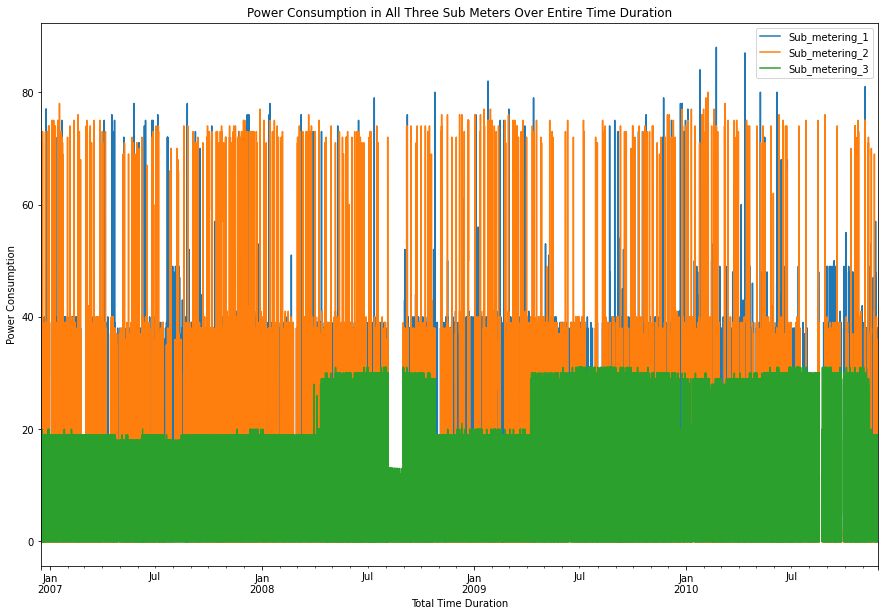

In [7]:
# A line plot of all the sub meters except 4 over all the entire time
# It seems sub_metering_1 is consuming higher power
household_power_consumption.plot.line(y=['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'], \
                                      title='Power Consumption in All Three Sub Meters Over Entire Time Duration', \
                                      figsize=(15, 10), xlabel='Total Time Duration', ylabel='Power Consumption')

In [8]:
# Statistics of all the fields
# Among sub meters (1 to 3) : Sub_metering_3 has highest mean - 6.38
household_power_consumption.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.819358e+01,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,9.314693e+00
std,1.762157e+01,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00,9.585916e+00
min,1.266667e+00,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+00
25%,5.133333e+00,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.800000e+00
50%,1.003333e+01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.500000e+00
75%,2.546667e+01,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.036667e+01
max,1.853667e+02,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.248333e+02


Text(0, 0.5, 'Power Consumption')

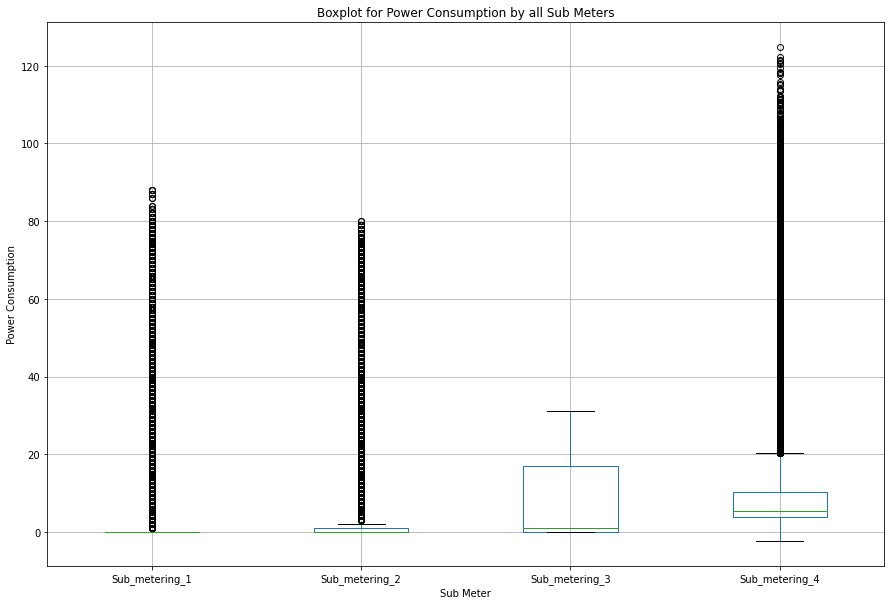

In [9]:
# Boxplot of all the sub_meterings
# The following can be observed from boxplots :-
# a. All the sub_meterings except sub_metering_3 have outliers
bplot = household_power_consumption.boxplot(column=['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Sub_metering_4'], figsize = (15, 10))
bplot.set_title('Boxplot for Power Consumption by all Sub Meters')
bplot.set_xlabel('Sub Meter')
bplot.set_ylabel('Power Consumption')

Text(0, 0.5, 'Power Consumption')

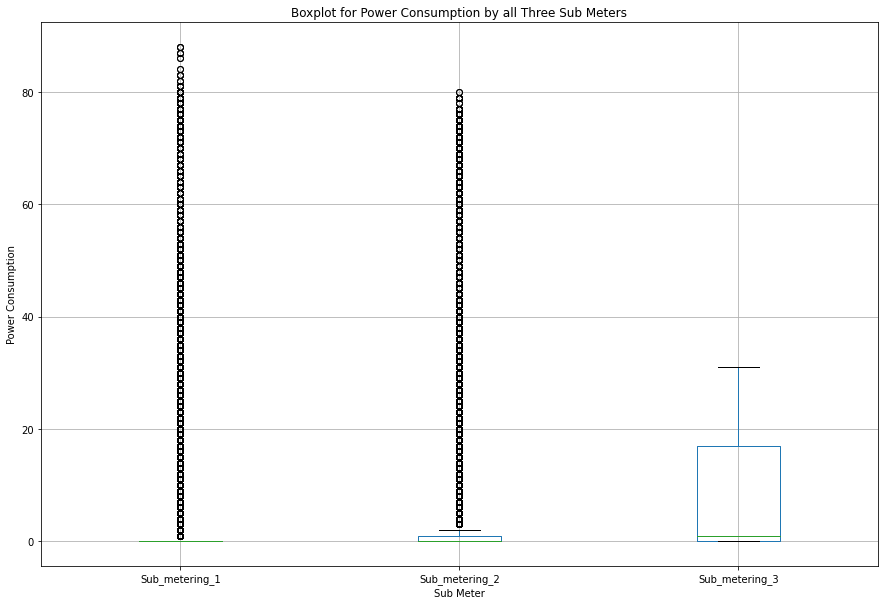

In [10]:
# Boxplot of all the three sub_meterings
# The following can be observed from boxplots :-
# a. Both sub_metering 1 and 2 have very high number of outliers
# b. sub_metering_3 has highest average power consumption
bplot = household_power_consumption.boxplot(column=['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'], figsize = (15, 10))
bplot.set_title('Boxplot for Power Consumption by all Three Sub Meters')
bplot.set_xlabel('Sub Meter')
bplot.set_ylabel('Power Consumption')

datetime.date(2006, 12, 31)

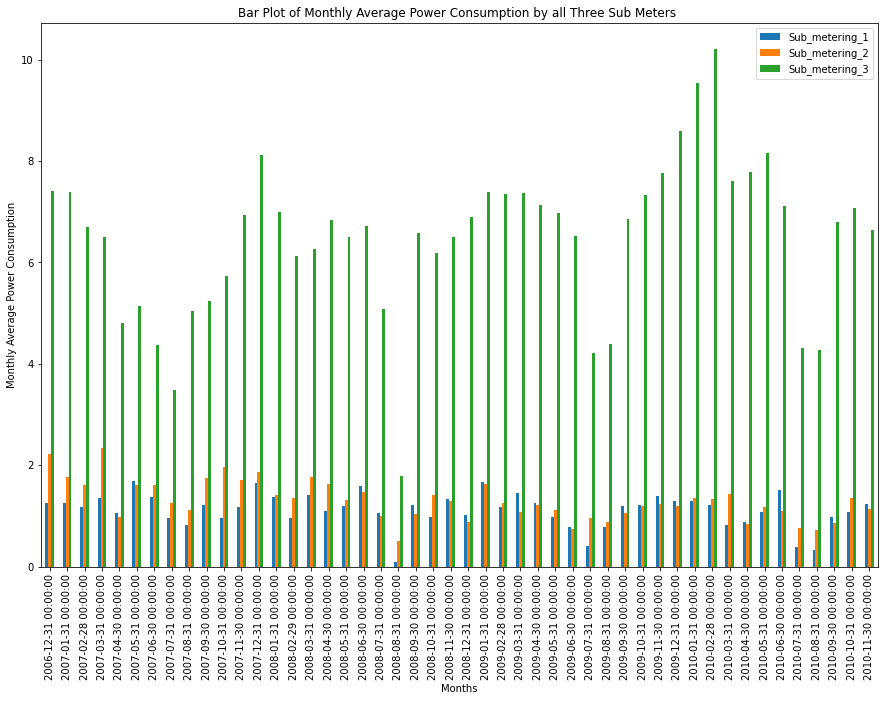

In [67]:
# Resampling data on month (taking monhtly average of all fields)
# Following are the observation after plotting data for sub_metering_1, sub_metering_2, sub_metering_3 :-
# a. Monthly average consumption is similar each year for all the sub meters
# b. Consumption increases during the months of Nov-Feb each year and decreases during Jul-Aug
monthly_power_consumption = household_power_consumption.resample('M').mean()
barplot = monthly_power_consumption.plot.bar(y=['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'], figsize = (15, 10))
barplot.set_title("Bar Plot of Monthly Average Power Consumption by all Three Sub Meters ")
barplot.set_xlabel("Months")
barplot.set_ylabel("Monthly Average Power Consumption")
from datetime import datetime
temp = list(monthly_power_consumption.index.strftime('%m/%d/%Y'))
#datetime_object = datetime.strptime('12/31/2006', '%m/%d/%Y').date()
#datetime_object.date()
datetime_object = [datetime.strptime(temp[i], '%m/%d/%Y').date() for i in range(0, len(temp))]
#barplot.set_xticks(datetime_object)

In [12]:
# Adding year and month field to resampled data for getting year and month of top five power consumption
monthly_power_consumption['year'] = monthly_power_consumption.index.year
monthly_power_consumption['month'] = monthly_power_consumption.index.month
# Sorting in ascending order on sub_metering_3 field as it is the highest power consumption sub_metering
highest_power_consumption = monthly_power_consumption.sort_values(by = ['Sub_metering_3'])
# Getting top five months with highest power consumption
# Highest power (10.21) is consumed in the month of Feb 2010
highest_power_consumption[['Sub_metering_3', 'year', 'month']].tail(5)

,Sub_metering_3,year,month
datetime,,,
2007-12-31,8.118977,2007,12
2010-05-31,8.168306,2010,5
2009-12-31,8.600497,2009,12
2010-01-31,9.538004,2010,1
2010-02-28,10.211667,2010,2


In [13]:
# Getting top five months with highest power consumption each year
yearly_highest_power_consumption = monthly_power_consumption.sort_values(by = ['year', 'Sub_metering_3', 'month'])
# for year 2006
(yearly_highest_power_consumption[yearly_highest_power_consumption['year']==2006])[['Sub_metering_3', 'year', 'month']].tail(5)

,Sub_metering_3,year,month
datetime,,,
2006-12-31,7.409558,2006,12


In [14]:
# for year 2007
(yearly_highest_power_consumption[yearly_highest_power_consumption['year']==2007])[['Sub_metering_3', 'year', 'month']].tail(5)

,Sub_metering_3,year,month
datetime,,,
2007-03-31,6.504648,2007,3
2007-02-28,6.703557,2007,2
2007-11-30,6.937590,2007,11
2007-01-31,7.383351,2007,1
2007-12-31,8.118977,2007,12


In [15]:
# for year 2008
(yearly_highest_power_consumption[yearly_highest_power_consumption['year']==2008])[['Sub_metering_3', 'year', 'month']].tail(5)

,Sub_metering_3,year,month
datetime,,,
2008-09-30,6.580602,2008,9
2008-06-30,6.715503,2008,6
2008-04-30,6.844398,2008,4
2008-12-31,6.895959,2008,12
2008-01-31,6.993324,2008,1


In [16]:
# for year 2009
(yearly_highest_power_consumption[yearly_highest_power_consumption['year']==2009])[['Sub_metering_3', 'year', 'month']].tail(5)

,Sub_metering_3,year,month
datetime,,,
2009-02-28,7.357065,2009,2
2009-03-31,7.363614,2009,3
2009-01-31,7.383812,2009,1
2009-11-30,7.767055,2009,11
2009-12-31,8.600497,2009,12


In [17]:
# for year 2010
(yearly_highest_power_consumption[yearly_highest_power_consumption['year']==2010])[['Sub_metering_3', 'year', 'month']].tail(5)

,Sub_metering_3,year,month
datetime,,,
2010-03-31,7.611574,2010,3
2010-04-30,7.780064,2010,4
2010-05-31,8.168306,2010,5
2010-01-31,9.538004,2010,1
2010-02-28,10.211667,2010,2


Text(0.5, 1.0, 'Line Plot for Monthly Average Reactive Power Consumption')

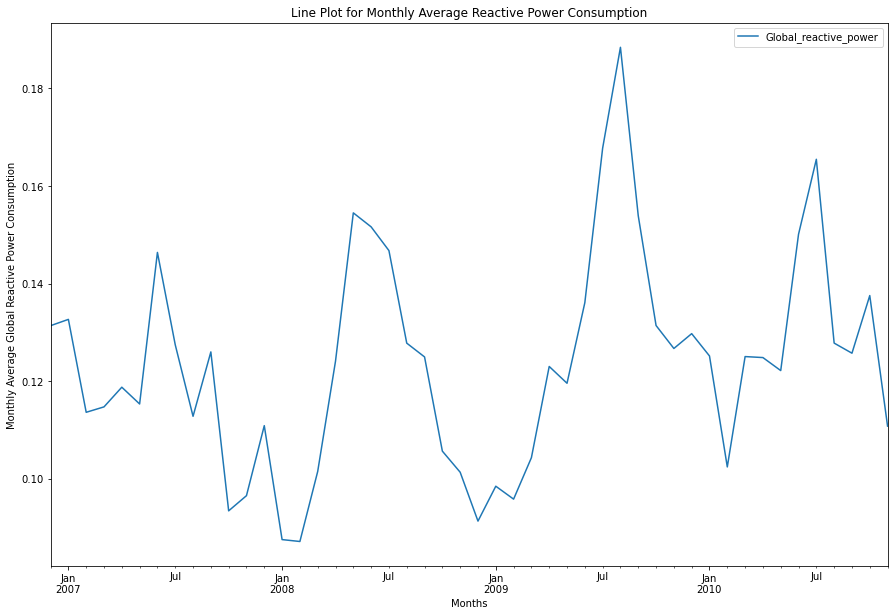

In [18]:
# Line plot for global reactive power on monthly average data
# Monthly average global reactive power is similar for each year
# global reactive power is high during the months of Jun-Aug and low during Dec-Jan
lplot = monthly_power_consumption.plot.line(y=['Global_reactive_power'], figsize=(15, 10))
lplot.set_xlabel('Months')
lplot.set_ylabel('Monthly Average Global Reactive Power Consumption')
lplot.set_title('Line Plot for Monthly Average Reactive Power Consumption')

In [19]:
# Getting top five months with highest global reactive power
# Highest global reactive power (0.18) is in the month of Aug 2009
highest_reactive_power = monthly_power_consumption.sort_values(by = ['Global_reactive_power'])
highest_reactive_power[['Global_reactive_power', 'year', 'month']].tail(5)

,Global_reactive_power,year,month
datetime,,,
2009-09-30,0.153901,2009,9
2008-05-31,0.154500,2008,5
2010-07-31,0.165481,2010,7
2009-07-31,0.167756,2009,7
2009-08-31,0.188426,2009,8


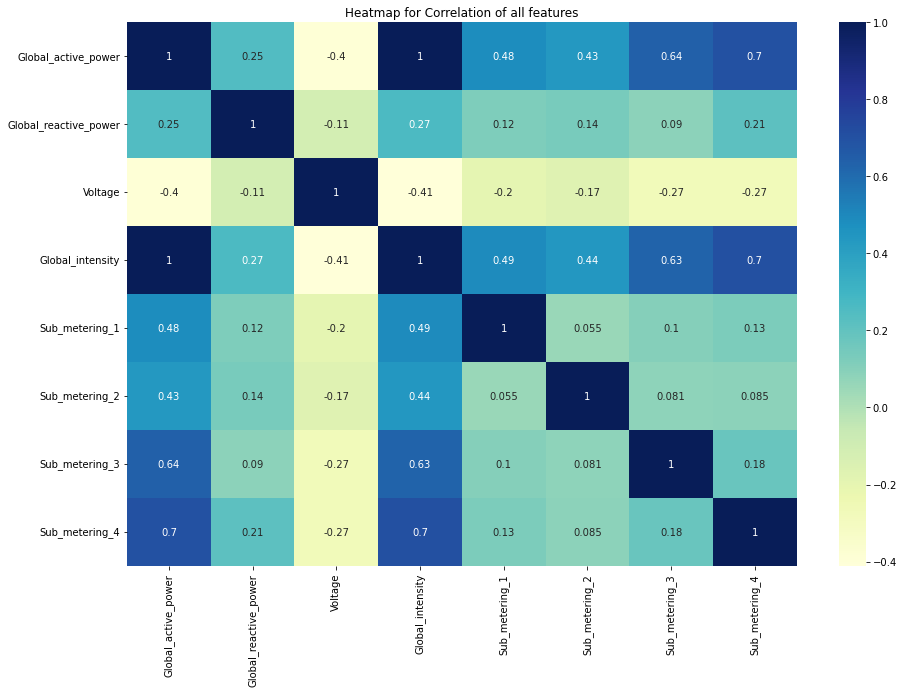

In [20]:
# Importing matplotlib and seaborn for plotting heatmap of correlation of features
import matplotlib.pyplot as plt
import seaborn as sb
# Plotting heatmap of correlation of features
"""
global active power and global intensity have a correlation of 1
Both have a perfect correlation because global intensity is the quantity of charge 
which passes in a conductor per unit of time and it should increase with increase in global active power and
decrease with decrease in global active power
"""
fig, ax = plt.subplots(figsize=(15,10))
dataplot = sb.heatmap(household_power_consumption.corr(), cmap="YlGnBu", annot=True, ax = ax)
ax.set_title('Heatmap for Correlation of all features')
plt.show()